# Arrays and Vectorized Computation

In [2]:
import numpy as np

## The Numpy ndarray: a multidimensional Array Object

In [3]:
data = np.random.randn(2, 3)

data

array([[-1.3969888 , -2.74888201, -1.58967343],
       [ 1.19396518,  0.44055373,  0.11880142]])

Then write mathematical operations with data:

In [4]:
print(data + data)

print(data * 10)


[[-2.7939776  -5.49776402 -3.17934686]
 [ 2.38793035  0.88110746  0.23760283]]
[[-13.96988798 -27.48882012 -15.89673432]
 [ 11.93965175   4.40553731   1.18801417]]


Every array has a *shape*, a tuple indicating the size of each dimension; a *dtype*, an object describing the data type of the array.

In [5]:
print(data.shape)

data.dtype

(2, 3)


dtype('float64')

## Creating ndarrays

The easiest way to create an array is to use the **array** function, it accepts any sequence-like object and produces a new Numpy array contains the passed data.

In [6]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [7]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


There are other ways to create Numpy array - **zeros** and **ones**.
To create a multidimensional array, pass tuple for the shape.

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.zeros((2,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
np.empty((2, 3, 2)) 
# it's not safe to assume the np.empty will return array of zeros, 
# it returns uninitialized memory and might contain non-zero garbage values

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

**arange** is an array-valued version of the build-in Python *range* function:

In [11]:
np.arange(5)

array([0, 1, 2, 3, 4])

Other array creation functions

In [12]:
np.array((2, 3)) # convert input to ndarray

array([2, 3])

In [13]:
np.asarray(1) # convert input to ndarray, but don't copy if the input is already a ndarray

array(1)

In [14]:
np.ones((1, 3)) # produce a ndarray of all 1s with the provided shape 

array([[1., 1., 1.]])

In [15]:
np.ones_like(np.arange(5)) # produce a ndarray of all 1s, and the shape is the same as input

array([1, 1, 1, 1, 1])

In [16]:
np.full((2, 3), 11)
np.full_like(np.arange(5), 11)

array([11, 11, 11, 11, 11])

In [17]:
np.eye(3) # create a square N * N itentiy matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
np.identity(3) # same as eye

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Arithmetic with Numpy Arrays (Vectorization)

In [19]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr*arr)
print(arr+arr)
print(arr-arr)

[[ 1  4  9]
 [16 25 36]]
[[ 2  4  6]
 [ 8 10 12]]
[[0 0 0]
 [0 0 0]]


Work with scalars:

In [20]:
print(1/arr)
print(arr ** 2)


[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 1  4  9]
 [16 25 36]]


## Basic Indexing and Slicing

One-dimensional arrays are simple:

In [21]:
arr = np.arange(10)
print(arr[5])

print(arr[5:8])

arr[5:8] = 12
print(arr)

arr_slice = arr[5:8]
arr_slice[:] = 64

print('arr: ', arr) # change of the slice will also change the original array values
print('arr_slice: ', arr_slice)

5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]
arr:  [ 0  1  2  3  4 64 64 64  8  9]
arr_slice:  [64 64 64]


With higher dimensional arrays, you have more options.

In [22]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [23]:
print(arr2d[2][2])
print(arr2d[2, 2])

9
9


In multidimensional arrays, if you omit the later indices, the returned objected will be a lower dimensional ndarray consisting of all the data along the higher dimensions.

In [24]:
arr3d = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [25]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
old_values = arr3d[0].copy()

# assign scalar value to a array
arr3d[0] = 64
arr3d

array([[[64, 64, 64],
        [64, 64, 64]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [27]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [28]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [30]:
arr2d[1, :2]

array([4, 5])

In [31]:
# the third column but only the first two rows
arr2d[:2, 2]

array([3, 6])

In [32]:
# slice only hiegher dimensional axes
arr2d[:, :1]

array([[1],
       [4],
       [7]])

## Boolean Indexing

In [33]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7, 4)
data

array([[ 0.75373493, -0.686679  , -1.44470143, -1.9113635 ],
       [ 1.73722258,  1.67312928, -1.33709906,  0.95412002],
       [-0.26008078, -0.72810509, -0.12547303,  2.1128612 ],
       [ 1.10734171, -1.23981665,  2.86902259,  1.14836233],
       [ 1.5130217 , -0.24708799, -1.58059674, -1.61970901],
       [-0.70978294,  1.71715761,  1.08731717,  1.02444191],
       [ 0.80761475, -0.60469584,  0.52876303,  1.95387644]])

If we want to select all the rows with name 'Bob'

In [34]:
names == 'Bob'

data[names == 'Bob'] # the first and 4th row

array([[ 0.75373493, -0.686679  , -1.44470143, -1.9113635 ],
       [ 1.10734171, -1.23981665,  2.86902259,  1.14836233]])

Select everthing except 'Bob'

In [35]:
data[~(names == 'Bob')] # other rows

array([[ 1.73722258,  1.67312928, -1.33709906,  0.95412002],
       [-0.26008078, -0.72810509, -0.12547303,  2.1128612 ],
       [ 1.5130217 , -0.24708799, -1.58059674, -1.61970901],
       [-0.70978294,  1.71715761,  1.08731717,  1.02444191],
       [ 0.80761475, -0.60469584,  0.52876303,  1.95387644]])

## Fancy Indexing

We can specify the desired order:

In [50]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

arr
# arr[[4, 3, 0, 6]]

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [56]:
y = np.array([0,0,0,1])
for c in np.arange(10):
    print(c)
    print ( y == c)

0
[ True  True  True False]
1
[False False False  True]
2
[False False False False]
3
[False False False False]
4
[False False False False]
5
[False False False False]
6
[False False False False]
7
[False False False False]
8
[False False False False]
9
[False False False False]


Using the negative indices, selects rows from the end:

In [37]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something diffent.

No matther of how many dimensions of array is passed, the result of fancy indexing with multiple integer arrays is always one-dimensional.

In [38]:
arr = np.arange(32).reshape((8, 4))

print('arr: ', arr)

arr[[1, 5, 7, 2], [0, 3, 1, 2]] # return (1, 0), (5, 3), (7, 1), (2, 2)

arr:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [39]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] # rectangular region formed by selecting of a subset of the matrix's rows and columns

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Transposing and Swapping Axes


In [40]:
arr = np.arange(15).reshape((3, 5))
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

The inner product of a matrix:

In [41]:
arr = np.random.randn(6, 3)

arr.T.dot(arr)

array([[ 6.61285505,  0.25692958, -0.76080007],
       [ 0.25692958,  4.4548443 , -0.88789612],
       [-0.76080007, -0.88789612, 11.79695628]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes:

In [42]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)

arr.transpose((1, 0, 2)) # the axes are reordered with the second axis first, the first axis second, and the last unchanged

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### swapaxes function

.T is a special case of swapping axes.

In [43]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Elment-wise Array Functions
A *ufunc* is a function that perform element-wise operations on all data in a ndarrays.

In [44]:
arr = np.arange(10)

print(np.sqrt(arr))

print(np.exp(arr))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [45]:
x = np.random.randn(8)
y = np.random.randn(8)
print("x: ", x)
print("y: ", y)

print("np.maximum: ", np.maximum(x, y))

x:  [ 0.95156975 -0.18538612  1.67110681  0.00392525 -0.28854474  0.68709775
 -0.14007528 -0.40893825]
y:  [-0.4263792  -1.0591365   0.06844484  1.17695552 -0.11489452 -0.0230136
 -0.84662989 -1.60422433]
np.maximum:  [ 0.95156975 -0.18538612  1.67110681  1.17695552 -0.11489452  0.68709775
 -0.14007528 -0.40893825]


In [46]:
arr = np.random.randn(7) * 5
print("arr: ", arr)
remainder, whole_part = np.modf(arr)

print("remainder: ", remainder)
print("whole_part: ", whole_part)

arr:  [  3.22445575  -1.62568675  -3.28485489   5.95144786 -12.23708953
  -0.53369182   0.88098128]
remainder:  [ 0.22445575 -0.62568675 -0.28485489  0.95144786 -0.23708953 -0.53369182
  0.88098128]
whole_part:  [  3.  -1.  -3.   5. -12.  -0.   0.]


## Array-Oriented Programming with Arrays

Vectorization: replace explicit loops with array expressions    

In [47]:
points = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(points, points) # takes two 1D arrays and produce two 2D matrices corresponding to all pairs of (x, y) in two arrays

ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [48]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Visualize the two-dimensional array:

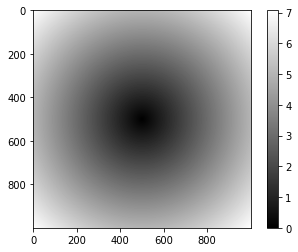

In [49]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()